In [64]:
import TMQGP as tm

In [65]:
import QuarkTM
from numpy import *
from scipy.integrate import quad

In [66]:
from scipy.misc import derivative

In [67]:
qrange = linspace(0, 5, 51)
erange = linspace(-5, 5, 201)

In [68]:
m = 0.5

In [69]:
pt = QuarkTM.Particle(m, qrange, erange, eps=1e-2)

In [70]:
Nc = 3
Nf = 3
Ns = 2

In [71]:
def Pfree(mu, T):
    UL = 5
    res =  quad(lambda z: z*z*T*log(1 + exp((-sqrt(m**2 + z**2) - mu)/T)) /2/pi**2, 0, UL)[0]
    res += quad(lambda z: z*z*T*log(1 + exp((-sqrt(m**2 + z**2) + mu)/T)) /2/pi**2, 0, UL)[0]
    return Nc*Nf*Ns*res

In [78]:
Trange = linspace(0.15, .5, 30)

In [79]:
ps0 = array([Pfree(0, T) for T in Trange])

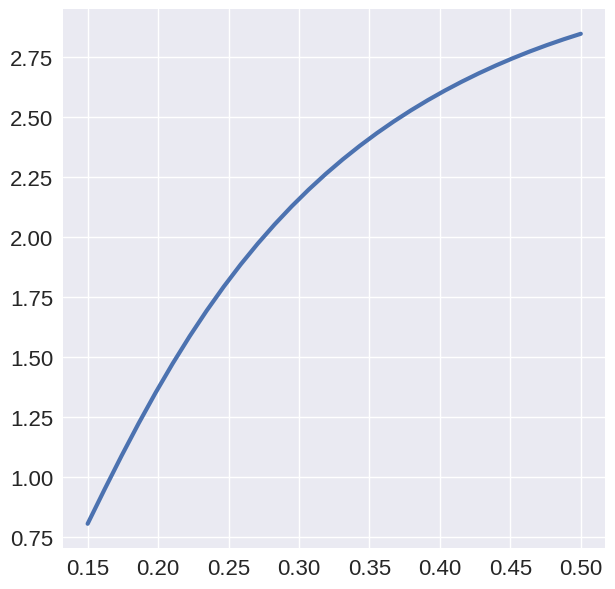

In [80]:
plt.plot(Trange, ps0/Trange**4)

In [81]:
chi2 = array([derivative(lambda z: Pfree(z, T)/T**2, 0, dx=1e-2, n=2) for T in Trange])

/tmp/ipykernel_260756/3126564020.py:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  chi2 = array([derivative(lambda z: Pfree(z, T)/T**2, 0, dx=1e-2, n=2) for T in Trange])


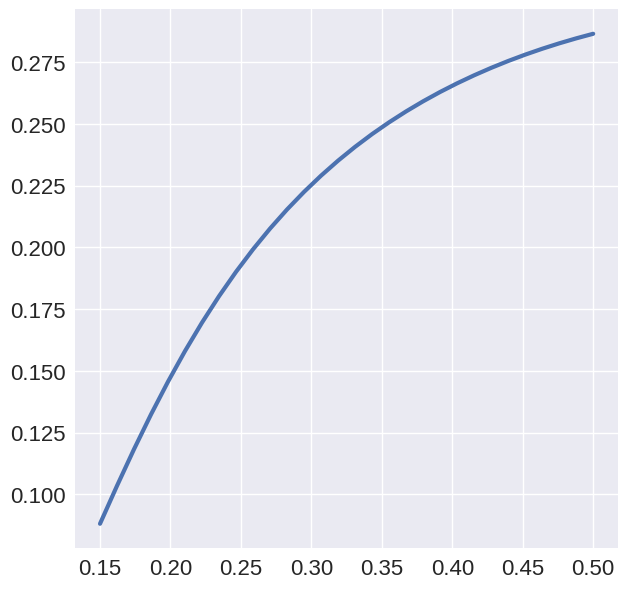

In [82]:
plt.plot(Trange, chi2/9)

Now numeric version

In [62]:
def P(mu, T):
    Gtab = np.array([[pt.G0(e, q, mu=mu) for e in erange] for q in qrange])
    iImG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(Gtab)))
    iReG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(Gtab)))

    ImS = array([pt.eps*(1 + np.tanh(erange/0.001))/2 for q in qrange])
    ReS = array([0*pt.eps*(1 + np.tanh(erange/0.001))/2 for q in qrange])

    iImS = tm.Interpolator2D(qrange, erange, ImS)
    iReS = tm.Interpolator2D(qrange, erange, ReS)
    
    return tm.OmQ_F(T, iImG, iReG), tm.OmS_F(T, iImG, iReG, iImS, iReS)

In [63]:
import tqdm

In [47]:
ps_out = array([P(0, T) for T in tqdm.tqdm(Trange)])


100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [00:23<00:00,  1.25it/s]


(0.0, 8.0)

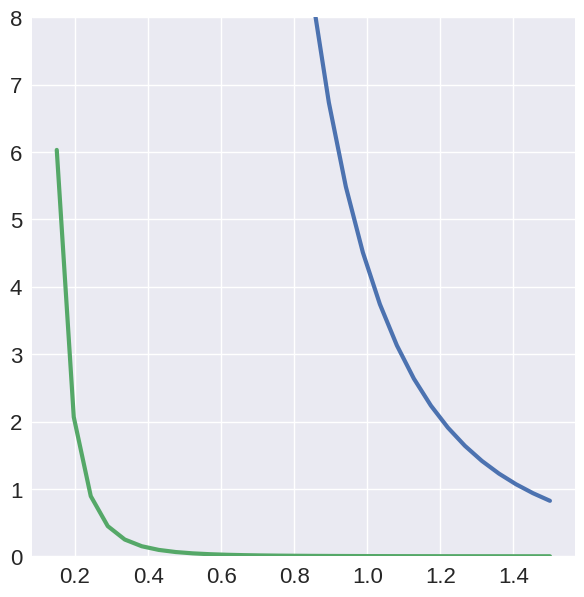

In [77]:
plt.plot(Trange, ps_out[:, 0]/Trange**4)
plt.plot(Trange, ps_out[:, 1]/Trange**4)

plt.ylim(0, 8)